In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
cities = pd.read_csv('C:/Users/acerpc/Desktop/data_folder/cities_10.csv',encoding='gbk')
cities

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7
5,上海,5408.8,40627,2196.2,2755.8,1970.2,779.3,2035.2,320.5,709.0
6,浙江,7670.0,16570,2356.5,3065.0,2296.6,1180.6,2877.5,294.2,566.9
7,福建,4682.0,13510,1047.1,1859.0,964.5,397.9,1663.3,173.7,272.9
8,广东,11769.7,15030,4224.6,4793.6,3022.9,1275.5,5013.6,1843.7,1201.6
9,广西,2455.4,5062,367.0,995.7,542.2,352.7,1025.5,15.1,186.7


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

scaler = StandardScaler()
standdata = scaler.fit_transform(cities.loc[:,"X1":])
pca = PCA(n_components = 2)
fa = FactorAnalysis(n_components = 2)
pca_scores = pca.fit_transform(standdata)
fa_scores = fa.fit_transform(standdata)

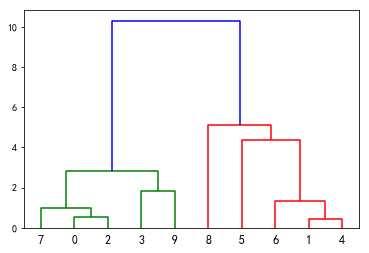

In [33]:
import scipy.cluster.hierarchy as sch
distance = sch.distance.pdist(pca_scores, 'euclidean')
Z = sch.linkage(distance, method='ward')
P = sch.dendrogram(Z)

In [34]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters=4,linkage='ward',compute_full_tree=False)
agglom.fit(pca_scores)

AgglomerativeClustering(affinity='euclidean', compute_full_tree=False,
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func=<function mean at 0x00000262DF417BF8>)

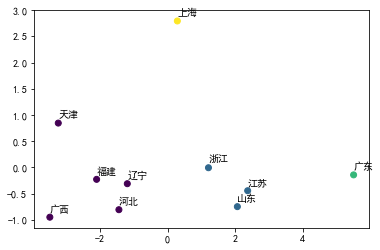

In [35]:
# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

plt.scatter(pca_scores[:,0],pca_scores[:,1],c=agglom.labels_,)
for a,b,c in zip(pca_scores[:,0],pca_scores[:,1],cities['AREA']):
    plt.text(a, b+0.1, c)